In [6]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from utils import basic_formatting

mpl.use('module://matplotlib_inline.backend_inline')

prop = mpl.font_manager.FontProperties('Roboto')
mpl.rcParams['font.sans-serif'] = prop.get_name()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.size']=16

COLOR = '#343434'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Supplemental figure 3: PhyloSor recapitulates community connectivity
We simulate phylogenies from contact networks that are variably connected, and determine the correlation between connectivity and PhyloSor similarity. Simulation was performed using a fork of [FAVITES](https://github.com/watronfire/FAVITES). The config file used can be found in `phylosor-simulations`.

We first load the data, and calculate summary statistics for each connectivity value. Each value is simulated 10 times, so upper and lower basically refer to the range rather than the 95% confidence interval.

In [26]:
res = pd.read_csv( "../data/phylosor_simulations.csv", parse_dates=["date"] )

median = lambda x: np.quantile( x, 0.5 )
upper = lambda x: np.quantile( x, 0.975 )
lower = lambda x: np.quantile( x, 0.025 )

plot_df = res.groupby( ["date", "connectivity"] )["value"].agg( [median, lower, upper ])
plot_df.columns = ["median", "upper", "lower"]
plot_df = plot_df.reset_index()

plot_df.head()

,date,connectivity,median,upper,lower
0,2019-12-01,0.001,0.0,0.0,0.0
1,2019-12-01,0.100,0.0,0.0,0.0
2,2019-12-01,0.125,0.0,0.0,0.0
3,2019-12-01,0.250,0.0,0.0,0.0
4,2019-12-01,0.500,0.0,0.0,0.0


To limit the effect of temporal stochasticity, we only look at the first month of the spread of the virus, even though we calculate all other months, and determine if there is a strong correlation between connectivity (as a fraction of inter-location connectivity) and phylosor similarity.

In [32]:
import statsmodels.api as sm

test = res.loc[res["date"]=="2020-01-01"]
test_x = test[["siteB", "value"]]
test_x.columns = ["const", "PhyloSor"]
test_y = test["connectivity"]

model = sm.OLS( test_y, test_x)
results = model.fit()
print( results.summary() )

                            OLS Regression Results                            
Dep. Variable:           connectivity   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     220.5
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           2.03e-21
Time:                        10:44:46   Log-Likelihood:                 67.770
No. Observations:                  60   AIC:                            -131.5
Df Residuals:                      58   BIC:                            -127.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0582      0.018     -3.204      0.0

Visualize the relationship between connectivity and phylosor similarity. This plot is Figure S3

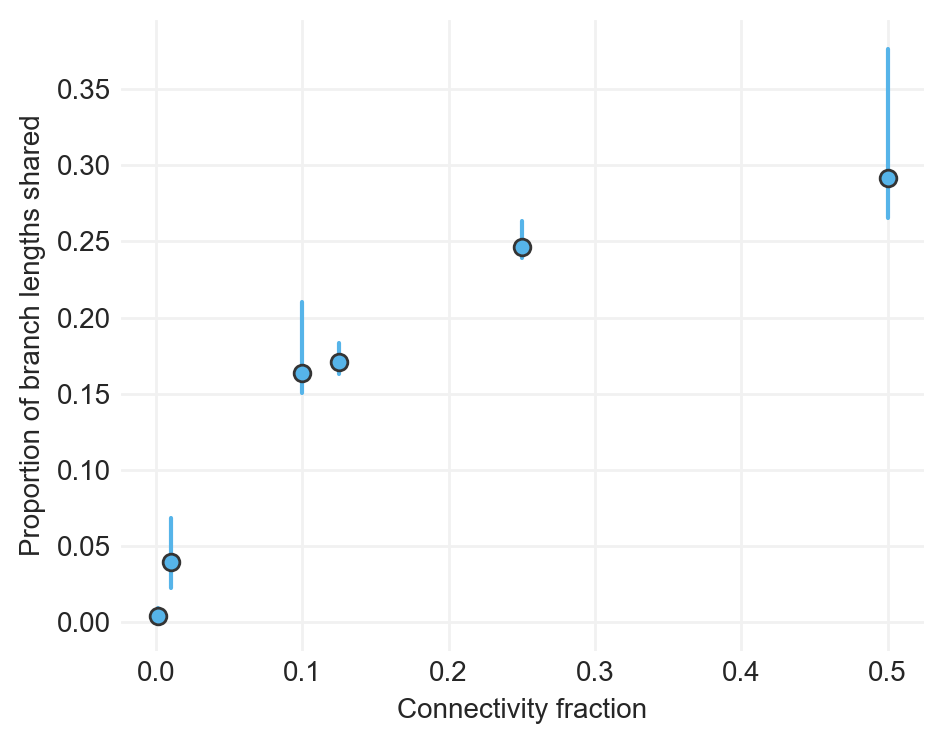

In [36]:
plot_df = plot_df.loc[plot_df["date"]=="2020-01-01"]

fig, ax = plt.subplots( dpi=200, figsize=(5,4))
ax.scatter( "connectivity", "median", data=plot_df, color="#56B4E9", edgecolor=COLOR, linewidths=1, zorder=5 )
ln = ax.vlines( plot_df["connectivity"], ymin=plot_df["lower"], ymax=plot_df["upper"], color="#56B4E9", zorder=4 )
ln.set_capstyle( "round" )

basic_formatting( ax, spines=[], which="both", xlabel="Connectivity fraction", ylabel="Proportion of branch lengths shared", ysize=10, xsize=10 )
ax.tick_params( axis="x", rotation=0)

plt.tight_layout()
plt.savefig( '../analyses/plots/figureSX_phylosor-simulation.pdf' )
plt.show()
